In [1]:
import pandas as pd
import numpy as np
ins=pd.read_csv('C:/Users/Faisal/R4_Residency/R4_Project/insurance.csv')
ins.head ()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
#Q3. a,b,c
print ('1. Shape of the data \n   ----------------')
print (ins.shape, '\n')
print ('2. Data type of each attribute \n   --------------------------')
print (ins.dtypes, '\n')
print ('3. Checking the presence of missing values  \n   -------------------------------------')
print (ins.isnull().sum(), '\n')
print ('There are no missing values available in any of the column')

1. Shape of the data 
   ----------------
(1338, 7) 

2. Data type of each attribute 
   --------------------------
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object 

3. Checking the presence of missing values  
   -------------------------------------
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64 

There are no missing values available in any of the column


In [3]:
#Q3 d
ins.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
print ('-Sample minimum \n-Lower quartile (25%) \n-Median\n-Upper quartile (75%)\n-Sample maximum \n The above 5 point summary is mentioned against each of the atttribute in the summary')

-Sample minimum 
-Lower quartile (25%) 
-Median
-Upper quartile (75%)
-Sample maximum 
 The above 5 point summary is mentioned against each of the atttribute in the summary


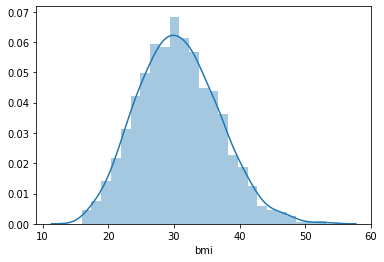

In [68]:
#Q3: e
import seaborn as sns
import matplotlib as plt
sns.distplot (ins['bmi'])

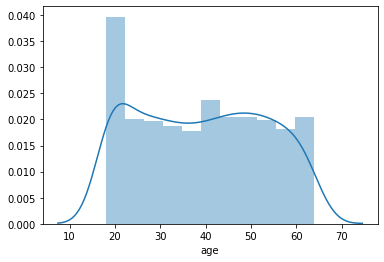

In [6]:
sns.distplot (ins['age'])

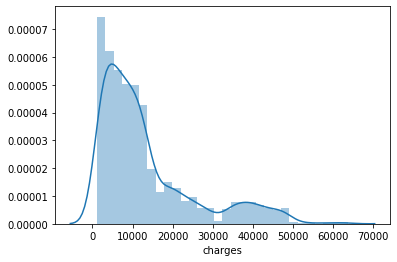

In [8]:
sns.distplot (ins['charges'])

In [9]:
#Q3 f
print ('Skewness bmi     : ',ins['bmi'].skew(axis=0, skipna=True))
print ('Skewness age     : ',ins['age'].skew(axis=0, skipna=True))
print ('Skewness charges : ',ins['charges'].skew(axis=0, skipna=True))

Skewness bmi     :  0.2840471105987448
Skewness age     :  0.05567251565299186
Skewness charges :  1.5158796580240388


In [10]:
#Q3 g
print ('Ways to find out Outliers\n1. Outliers can be visually found using whisker boxplot \nOR \n2. Finding the points beyond Q1-1.5*IQR and Q3+1.5*IQR ')

Ways to find out Outliers
1. Outliers can be visually found using whisker boxplot 
OR 
2. Finding the points beyond Q1-1.5*IQR and Q3+1.5*IQR 


Outliers in bmi
It can be seen that there are some points lying outside the box towards higher side, these are outliers


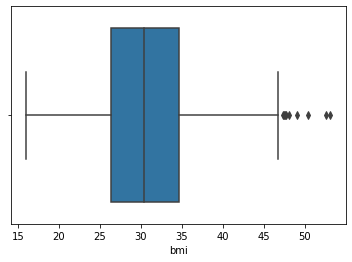

In [11]:
print ('Outliers in bmi')
sns.boxplot(ins['bmi'])
print ('It can be seen that there are some points lying outside the box towards higher side, these are outliers')

In [12]:
q1_bmi=np.percentile(ins['bmi'],25)
q3_bmi=np.percentile(ins['bmi'],75)
iqr_bmi=np.subtract(*np.percentile(ins['bmi'],[75,25]))
print ('q1_bmi =',q1_bmi,', q3_bmi=',q3_bmi,', iqr_bmi=',iqr_bmi)
print ('Lower Threshold =',(q1_bmi-1.5*iqr_bmi),'Upper Threshold =',(q3_bmi+1.5*iqr_bmi) )
print ('Finding Outliers based on qurtile range :')
print (ins['bmi']<(q1_bmi-1.5*iqr_bmi)) 
print (ins['bmi']>(q3_bmi+1.5*iqr_bmi))

q1_bmi = 26.29625 , q3_bmi= 34.69375 , iqr_bmi= 8.3975
Lower Threshold = 13.7 Upper Threshold = 47.290000000000006
Finding Outliers based on qurtile range :
0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1308    False
1309    False
1310    False
1311    False
1312    False
1313    False
1314    False
1315    False
1316    False
1317    False
1318    False
1319    False
1320    False
1321    False
1322    False
1323    False
1324    False
1325    False
1326    False
1327    False
1328    False
1329    False
1330    False
1331    False
1332    False
1333    False
1334    False
1335    False
1336    False
133

In [13]:
from scipy import stats
z_bmi=np.abs(stats.zscore(ins['bmi']))
print ('z_bmi :',z_bmi)
threshold=3
print('Rows number for bmi which is an outlier : ',np.where (z_bmi>3))

z_bmi : [0.45332    0.5096211  0.38330685 ... 1.0148781  0.79781341 0.26138796]
Rows number for bmi which is an outlier :  (array([ 116,  847, 1047, 1317], dtype=int64),)


In [14]:
print ('Values of outliers against eah row ')
print (ins.loc[[116,847,1047,1317],'bmi'])

Values of outliers against eah row 
116     49.06
847     50.38
1047    52.58
1317    53.13
Name: bmi, dtype: float64


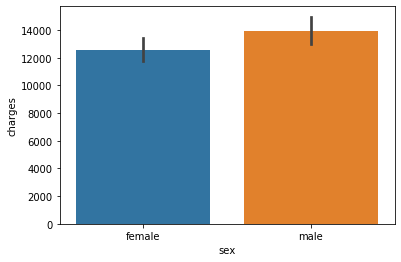

In [15]:
#Q3 h
sns.barplot(data=ins,x='sex',y='charges')

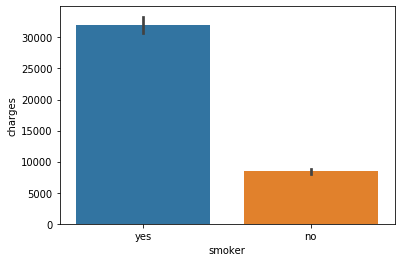

In [16]:
sns.barplot(data=ins,x='smoker',y='charges')

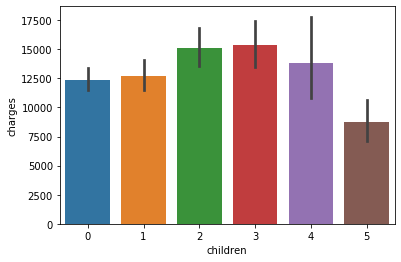

In [17]:
sns.barplot(data=ins,x='children',y='charges')

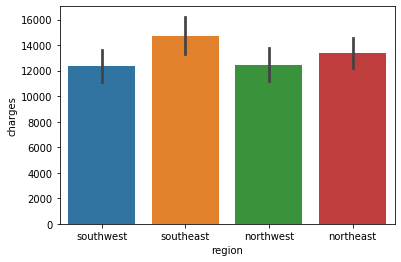

In [18]:
sns.barplot(data=ins,x='region',y='charges')

In [ ]:
sns.pairplot(ins, hue='charges')

C:\Users\Faisal\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Faisal\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Faisal\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Faisal\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


In [19]:
#4a. Do charges of people who smoke differ significantly  from the people who don't?  

print ('Q4(a)_Ans : Yes, it is evident that charges for smokers is significantly higher from the people who don\'t as the avregae charge for smoke is 32000 which is much higher than charges for non-smoker i.e. 8434')

Q4(a)_Ans : Yes, it is evident that charges for smokers is significantly higher from the people who don't as the avregae charge for smoke is 32000 which is much higher than charges for non-smoker i.e. 8434


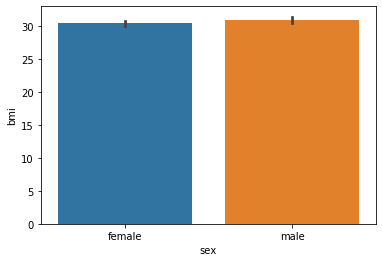

In [20]:
#4b. Does bmi of males differ significantly from that of  females?  
sns.barplot(data=ins,x='sex',y='bmi')

In [21]:
print ('Q4(b)_Ans : BMI of male is not siginificantly different from females')

Q4(b)_Ans : BMI of male is not siginificantly different from females


Though not significantly, but it is evident from the plot that proportion of smokers is more in male than female


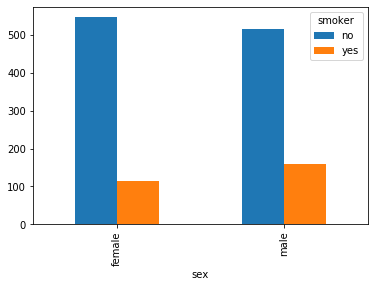

In [45]:
#4c. Is the proportion of smokers significantly different  in different genders?  
(ins.groupby(['sex','smoker']).size().unstack().plot.bar())
#data=ins,x='sex',y=ins['smoker'].count())
print ('Though not significantly, but it is evident from the plot that proportion of smokers is more in male than female')

FacetGrid can also be used for multile disctributions. We can observe that the distribution is quite overlapping and count of  children have not much impact on bmi distribution


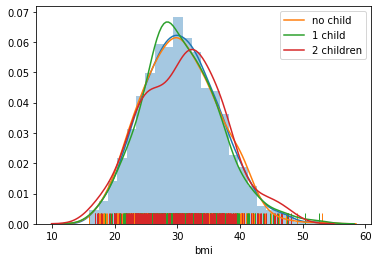

In [80]:
#4d. Is the distribution of bmi across women with no  children, one child and two children, the same ?  
sns.distplot(ins['bmi']) 

# Sort the dataframe by target
target_0 = ins.loc[ins['children'] == 0]
target_1 = ins.loc[ins['children'] == 1]
target_2 = ins.loc[ins['children'] == 2]

sns.distplot(target_0[['bmi']], hist=False, rug=True,label='no child')
sns.distplot(target_1[['bmi']], hist=False, rug=True,label='1 child')
sns.distplot(target_2[['bmi']], hist=False, rug=True,label='2 children')

print ('FacetGrid can also be used for multile disctributions. We can observe that the distribution is quite overlapping and count of  children have not much impact on bmi distribution')